# telecom churn prediction  Part 2 Feature (transformation, Scaling, feature selection,model building )

In [1]:
#load necessary libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('df_part_1_completed.csv')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Lets not include customerID column in train test split- this is not required for model buidling 

### Yes, it is generally recommended to perform the train-test split before encoding categorical variables. The train-test split is typically done to separate the dataset into two subsets: one for training the model and the other for evaluating its performance.

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
#All shapes look fine
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4930, 19), (2113, 19), (4930,), (2113,))

### Lets also change No Phone service and No Internet service to No  ( to make things simple)
### We can do this because No internet service mean - person is also not taking other service like online backup, device protecton,streaming services

In [7]:
X_train.replace('No internet service','No',inplace=True)
X_train.replace('No phone service','No',inplace=True)

In [242]:
X_train.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1695,Male,0,Yes,Yes,54,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Electronic check,70.70,3770.00
1095,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.55,80.55
3889,Male,0,No,No,13,Yes,No,No,No,No,No,No,No,No,One year,No,Credit card (automatic),19.30,259.65
3667,Female,1,Yes,Yes,24,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,96.55,2263.45
2902,Female,1,No,No,6,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.10,450.90


In [8]:
X_test.replace('No internet service','No',inplace=True)
X_test.replace('No phone service','No',inplace=True)

## Feature engg

### 1. Feature Transformation 

In [10]:
X_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 1695 to 860
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4930 non-null   object 
 1   SeniorCitizen     4930 non-null   int64  
 2   Partner           4930 non-null   object 
 3   Dependents        4930 non-null   object 
 4   tenure            4930 non-null   int64  
 5   PhoneService      4930 non-null   object 
 6   MultipleLines     4930 non-null   object 
 7   InternetService   4930 non-null   object 
 8   OnlineSecurity    4930 non-null   object 
 9   OnlineBackup      4930 non-null   object 
 10  DeviceProtection  4930 non-null   object 
 11  TechSupport       4930 non-null   object 
 12  StreamingTV       4930 non-null   object 
 13  StreamingMovies   4930 non-null   object 
 14  Contract          4930 non-null   object 
 15  PaperlessBilling  4930 non-null   object 
 16  PaymentMethod     4930 non-null   object

#### * All object column (except contract) can be converted using nominal encoding(one hot encoding using sparse_output =True  as our data is value is going to have lot of 0 values after this

#### * Contract column will be converted using ordinal encoding as it is containing order in the data        

#### * Churn column will be converted using label encoder

#### * Lets use column transformer to do within a single command 

## Handling categorical variable 

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder , LabelEncoder



In [10]:
transformer  = ColumnTransformer(transformers=[
    ("trf1",OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']]), ['Contract']),
    ("trf2",OneHotEncoder(sparse_output=True,drop='first',dtype='int64'),['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'PaymentMethod']),
    ("trf3",OneHotEncoder(sparse_output=True,drop=None,dtype='int64'),['InternetService']) # needed for customer usage
],remainder='passthrough')

transformer 

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf1',
                                 OrdinalEncoder(categories=[['Month-to-month',
                                                             'One year',
                                                             'Two year']]),
                                 ['Contract']),
                                ('trf2',
                                 OneHotEncoder(drop='first', dtype='int64'),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies',
                                  'PaperlessBilling', 'PaymentMethod']),
                                ('trf3', OneHotEncoder(dtype='int64'),
                                 ['InternetService'])])

In [11]:
transformer.fit_transform(X_train)
transformer.fit_transform(X_test)
column_names=transformer.get_feature_names_out()
column_names


array(['trf1__Contract', 'trf2__gender_Male', 'trf2__Partner_Yes',
       'trf2__Dependents_Yes', 'trf2__PhoneService_Yes',
       'trf2__MultipleLines_Yes', 'trf2__OnlineSecurity_Yes',
       'trf2__OnlineBackup_Yes', 'trf2__DeviceProtection_Yes',
       'trf2__TechSupport_Yes', 'trf2__StreamingTV_Yes',
       'trf2__StreamingMovies_Yes', 'trf2__PaperlessBilling_Yes',
       'trf2__PaymentMethod_Credit card (automatic)',
       'trf2__PaymentMethod_Electronic check',
       'trf2__PaymentMethod_Mailed check', 'trf3__InternetService_DSL',
       'trf3__InternetService_Fiber optic', 'trf3__InternetService_No',
       'remainder__SeniorCitizen', 'remainder__tenure',
       'remainder__MonthlyCharges', 'remainder__TotalCharges'],
      dtype=object)

In [12]:
X_train=pd.DataFrame(transformer.fit_transform(X_train),columns=column_names)
X_train

,trf1__Contract,trf2__gender_Male,trf2__Partner_Yes,trf2__Dependents_Yes,trf2__PhoneService_Yes,trf2__MultipleLines_Yes,trf2__OnlineSecurity_Yes,trf2__OnlineBackup_Yes,trf2__DeviceProtection_Yes,trf2__TechSupport_Yes,...,trf2__PaymentMethod_Credit card (automatic),trf2__PaymentMethod_Electronic check,trf2__PaymentMethod_Mailed check,trf3__InternetService_DSL,trf3__InternetService_Fiber optic,trf3__InternetService_No,remainder__SeniorCitizen,remainder__tenure,remainder__MonthlyCharges,remainder__TotalCharges
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,54.0,70.70,3770.00
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,80.55,80.55
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,19.30,259.65
3,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,24.0,96.55,2263.45
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6.0,74.10,450.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,95.00,95.00
4926,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,91.10,2198.30
4927,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,12.0,21.15,306.05
4928,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,12.0,99.45,1200.15


In [13]:
X_test=pd.DataFrame(transformer.fit_transform(X_test),columns=column_names)
X_test

,trf1__Contract,trf2__gender_Male,trf2__Partner_Yes,trf2__Dependents_Yes,trf2__PhoneService_Yes,trf2__MultipleLines_Yes,trf2__OnlineSecurity_Yes,trf2__OnlineBackup_Yes,trf2__DeviceProtection_Yes,trf2__TechSupport_Yes,...,trf2__PaymentMethod_Credit card (automatic),trf2__PaymentMethod_Electronic check,trf2__PaymentMethod_Mailed check,trf3__InternetService_DSL,trf3__InternetService_Fiber optic,trf3__InternetService_No,remainder__SeniorCitizen,remainder__tenure,remainder__MonthlyCharges,remainder__TotalCharges
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,24.80,24.80
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,41.0,25.25,996.45
2,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,52.0,19.35,1031.70
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,76.35,76.35
4,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,67.0,50.55,3260.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,70.15,70.15
2109,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,44.65,44.65
2110,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,60.50,3694.45
2111,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,90.70,1781.35


## 2. Feature Construction 


In [20]:
#cross val score prior to feature construction 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#np.mean(cross_val_score(LogisticRegression(),X_train,y_train,scoring='accuracy',cv=20))

# a. Grouping existing features(partner and dependents) in dataset and create new feature family type(alone, couple, large family) -Also test whehter it is improving the performance of model)

In [15]:
X_train_reduced=X_train.copy()
X_test_reduced = X_test.copy()

In [16]:
def myfunc(num):
    if num == 1.0:
        #alone
        return 0.0
    elif num ==2.0:
        # couple
        return 1.0
    else:
        # large family
        return 2.0

In [17]:
X_train_reduced.insert(4,'Family_size', X_train_reduced['trf2__Partner_Yes'] + X_train_reduced['trf2__Dependents_Yes']+1)
X_test_reduced.insert(4,'Family_size', X_test_reduced['trf2__Partner_Yes'] + X_test_reduced['trf2__Dependents_Yes']+1)

X_train_reduced.insert(5,'Family_Type', X_train_reduced['Family_size'].apply(myfunc))
X_test_reduced.insert(5,'Family_Type', X_test_reduced['Family_size'].apply(myfunc))

X_train_reduced.drop(columns=['trf2__Partner_Yes','trf2__Dependents_Yes','Family_size'],inplace=True)
X_test_reduced.drop(columns=['trf2__Partner_Yes','trf2__Dependents_Yes','Family_size'],inplace=True)


In [21]:
lr = LogisticRegression()
lr_reduced = LogisticRegression()
lr.fit(X_train,y_train)
lr_reduced.fit(X_train_reduced,y_train)

y_pred = lr.predict(X_test)
y_pred_reduced = lr_reduced.predict(X_test_reduced)


print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_reduced))

Actual 0.8088026502602934
Scaled 0.8078561287269286


C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


####  Lets not choose for now - above addition of new column family size and drop of depenent and partner column - as accuracy is reducting a little 

In [22]:
#
#let check performance after adding customer_usage

X_train_reduced=X_train.copy()
X_test_reduced = X_test.copy()
X_train_reduced.insert(20,'customer_services_enrolled', X_train_reduced['trf2__PhoneService_Yes'] + X_train_reduced['trf2__MultipleLines_Yes']+ X_train_reduced['trf2__OnlineSecurity_Yes'] + X_train_reduced['trf2__OnlineBackup_Yes'] + X_train_reduced['trf2__DeviceProtection_Yes'] + X_train_reduced['trf2__TechSupport_Yes'] + X_train_reduced['trf2__StreamingTV_Yes'] + X_train_reduced['trf2__StreamingMovies_Yes'])
X_test_reduced.insert(20,'customer_services_enrolled', X_test_reduced['trf2__PhoneService_Yes'] + X_test_reduced['trf2__MultipleLines_Yes']+ X_test_reduced['trf2__OnlineSecurity_Yes'] + X_test_reduced['trf2__OnlineBackup_Yes'] + X_test_reduced['trf2__DeviceProtection_Yes'] + X_test_reduced['trf2__TechSupport_Yes'] + X_test_reduced['trf2__StreamingTV_Yes'] + X_test_reduced['trf2__StreamingMovies_Yes'])

lr = LogisticRegression()
lr_reduced = LogisticRegression()
lr.fit(X_train,y_train)
lr_reduced.fit(X_train_reduced,y_train)

y_pred = lr.predict(X_test)
y_pred_reduced = lr_reduced.predict(X_test_reduced)


print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_reduced))


Actual 0.8088026502602934
Scaled 0.8111689540937056


C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Addition of Customer usage  - is increasing performacne - this is tested above with logistic regression - Lets include in main dataset 

## b. Create new column customer_usage in dataset

In [263]:
X_train.head(5)

,trf1__Contract,trf2__gender_Male,Family_Type,trf2__PhoneService_Yes,trf2__MultipleLines_Yes,trf2__OnlineSecurity_Yes,trf2__OnlineBackup_Yes,trf2__DeviceProtection_Yes,trf2__TechSupport_Yes,trf2__StreamingTV_Yes,...,trf2__PaymentMethod_Credit card (automatic),trf2__PaymentMethod_Electronic check,trf2__PaymentMethod_Mailed check,trf3__InternetService_DSL,trf3__InternetService_Fiber optic,trf3__InternetService_No,remainder__SeniorCitizen,remainder__tenure,remainder__MonthlyCharges,remainder__TotalCharges
0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,54.0,70.70,3770.00
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,80.55,80.55
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,19.30,259.65
3,2.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,24.0,96.55,2263.45
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6.0,74.10,450.90


In [277]:
#X_train.drop(columns=['customer_services_enrolled'],inplace=True)

In [23]:
X_train.insert(20,'customer_services_enrolled', X_train['trf2__PhoneService_Yes'] + X_train['trf2__MultipleLines_Yes']+ X_train['trf2__OnlineSecurity_Yes'] + X_train['trf2__OnlineBackup_Yes'] + X_train['trf2__DeviceProtection_Yes'] + X_train['trf2__TechSupport_Yes'] + X_train['trf2__StreamingTV_Yes'] + X_train['trf2__StreamingMovies_Yes'])
X_test.insert(20,'customer_services_enrolled', X_test['trf2__PhoneService_Yes'] + X_test['trf2__MultipleLines_Yes']+ X_test['trf2__OnlineSecurity_Yes'] + X_test['trf2__OnlineBackup_Yes'] + X_test['trf2__DeviceProtection_Yes'] + X_test['trf2__TechSupport_Yes'] + X_test['trf2__StreamingTV_Yes'] + X_test['trf2__StreamingMovies_Yes'])

In [24]:
pd.set_option('display.max_columns', None)  # Show all columns
X_train.head(10)

,trf1__Contract,trf2__gender_Male,trf2__Partner_Yes,trf2__Dependents_Yes,trf2__PhoneService_Yes,trf2__MultipleLines_Yes,trf2__OnlineSecurity_Yes,trf2__OnlineBackup_Yes,trf2__DeviceProtection_Yes,trf2__TechSupport_Yes,trf2__StreamingTV_Yes,trf2__StreamingMovies_Yes,trf2__PaperlessBilling_Yes,trf2__PaymentMethod_Credit card (automatic),trf2__PaymentMethod_Electronic check,trf2__PaymentMethod_Mailed check,trf3__InternetService_DSL,trf3__InternetService_Fiber optic,trf3__InternetService_No,remainder__SeniorCitizen,customer_services_enrolled,remainder__tenure,remainder__MonthlyCharges,remainder__TotalCharges
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,54.0,70.70,3770.00
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,80.55,80.55
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,13.0,19.30,259.65
3,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,24.0,96.55,2263.45
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,6.0,74.10,450.90
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6.0,38.0,102.60,4009.20
6,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,12.0,85.15,979.05
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,26.0,44.65,1156.55
8,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,6.0,40.55,217.50
9,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,67.0,87.40,5918.80


## b. feature scaling 

In [194]:
X_train

,trf1__Contract,trf2__gender_Male,trf2__Partner_Yes,trf2__Dependents_Yes,trf2__PhoneService_Yes,trf2__MultipleLines_No phone service,trf2__MultipleLines_Yes,trf2__InternetService_Fiber optic,trf2__InternetService_No,trf2__OnlineSecurity_No internet service,...,trf2__StreamingMovies_No internet service,trf2__StreamingMovies_Yes,trf2__PaperlessBilling_Yes,trf2__PaymentMethod_Credit card (automatic),trf2__PaymentMethod_Electronic check,trf2__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__tenure,remainder__MonthlyCharges,remainder__TotalCharges
0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,54.0,70.70,3770.00
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,80.55,80.55
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,19.30,259.65
3,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,24.0,96.55,2263.45
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,6.0,74.10,450.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,95.00,95.00
4926,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,23.0,91.10,2198.30
4927,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,12.0,21.15,306.05
4928,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,12.0,99.45,1200.15


### StandardScaler

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)


print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8111689540937056
Scaled 0.812588736393753


C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Lets try other scaling tech - Min-Max scaler

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)


print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8111689540937056
Scaled 0.812588736393753


C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Lets try other scaling tech - MaxAbs scaling

In [28]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)


print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8111689540937056
Scaled 0.812588736393753


C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Lets try other scaling tech - Robust scaling


* The RobustScaler is a preprocessing technique in scikit-learn that is used to scale features using statistics that are robust to outliers. It is particularly useful when the data contains outliers or is not normally distributed.

In [34]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)


print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8111689540937056
Scaled 0.8140085186938003


C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 0.8135352579271179  - Robust scaling and MinMax are giving good result  as compared to other scaling techniques  - Robust is causing negative values insome column  - which is not required  here as we will construt new features- so will choose Min-Max [0,1]

In [38]:
X_train_scaled.head(10)

,trf1__Contract,trf2__gender_Male,trf2__Partner_Yes,trf2__Dependents_Yes,trf2__PhoneService_Yes,trf2__MultipleLines_Yes,trf2__OnlineSecurity_Yes,trf2__OnlineBackup_Yes,trf2__DeviceProtection_Yes,trf2__TechSupport_Yes,trf2__StreamingTV_Yes,trf2__StreamingMovies_Yes,trf2__PaperlessBilling_Yes,trf2__PaymentMethod_Credit card (automatic),trf2__PaymentMethod_Electronic check,trf2__PaymentMethod_Mailed check,trf3__InternetService_DSL,trf3__InternetService_Fiber optic,trf3__InternetService_No,remainder__SeniorCitizen,customer_services_enrolled,remainder__tenure,remainder__MonthlyCharges,remainder__TotalCharges
0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.625,0.750000,0.522671,0.434092
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.250,0.013889,0.620827,0.009275
2,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.125,0.180556,0.010463,0.029897
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.500,0.333333,0.780269,0.260622
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.250,0.083333,0.556552,0.051918
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.750,0.527778,0.840558,0.461634
6,0.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.375,0.166667,0.666667,0.112731
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.375,0.361111,0.263079,0.133169
8,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.375,0.083333,0.222222,0.025044
9,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.500,0.930556,0.689088,0.681513


<AxesSubplot: >

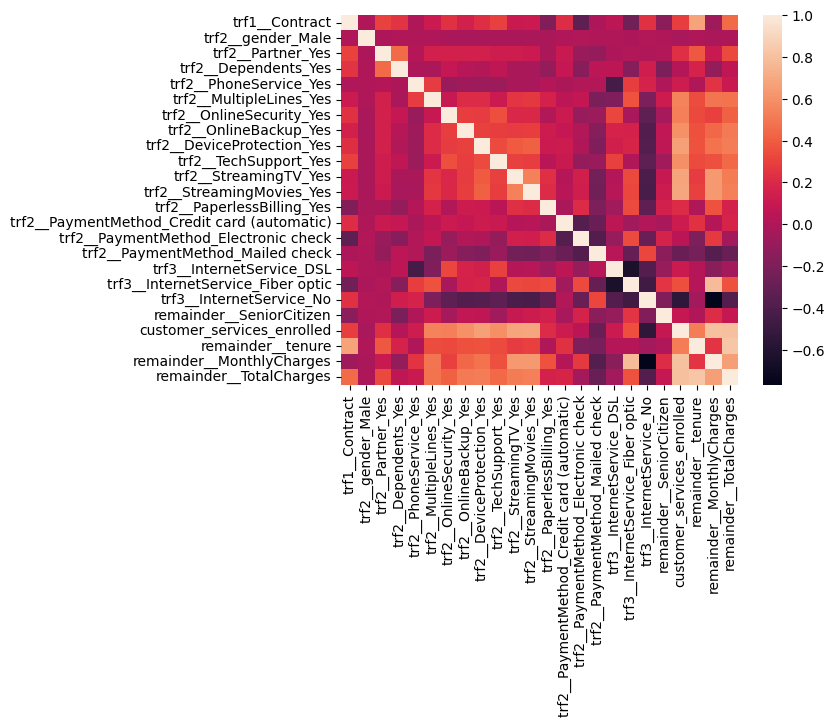

In [40]:
sns.heatmap(X_train_scaled.corr())

# 2. Feature extraction 

In [52]:
#first try with Ensemble methods - Random forest  
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [53]:
rf=RandomForestClassifier(random_state=42)

In [54]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [116]:
# Print the selected features
selected_features = feature_selector.get_support(indices=True)
for feature_idx in selected_features:
    print("Column",X_train_scaled.columns[feature_idx],"Feature importaance value is",rf.feature_importances_[feature_idx])

Column trf1__Contract Feature importaance value is 0.06936417837261702
Column customer_services_enrolled Feature importaance value is 0.04484615941664691
Column remainder__tenure Feature importaance value is 0.16241236728147246
Column remainder__MonthlyCharges Feature importaance value is 0.16072992183792154
Column remainder__TotalCharges Feature importaance value is 0.18565386751008212


In [126]:
feature_selector = SelectFromModel(rf, prefit=True)

X_train_new = feature_selector.transform(X_train_scaled)
X_test_new = feature_selector.transform(X_test_scaled)
selected_feature_names = X_train_scaled.columns[feature_selector.get_support()]
selected_feature_names


C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['trf1__Contract', 'customer_services_enrolled', 'remainder__tenure',
       'remainder__MonthlyCharges', 'remainder__TotalCharges'],
      dtype='object')

In [127]:
X_train_final = pd.DataFrame(X_train_new, columns=selected_feature_names)
X_test_final = pd.DataFrame(X_test_new, columns=selected_feature_names)


In [128]:
X_train_final

,trf1__Contract,customer_services_enrolled,remainder__tenure,remainder__MonthlyCharges,remainder__TotalCharges
0,0.5,0.625,0.750000,0.522671,0.434092
1,0.0,0.250,0.013889,0.620827,0.009275
2,0.5,0.125,0.180556,0.010463,0.029897
3,1.0,0.500,0.333333,0.780269,0.260622
4,0.0,0.250,0.083333,0.556552,0.051918
...,...,...,...,...,...
4925,0.0,0.500,0.013889,0.764823,0.010939
4926,1.0,1.000,0.319444,0.725959,0.253120
4927,0.0,0.125,0.166667,0.028899,0.035240
4928,0.0,0.625,0.166667,0.809168,0.138190


In [129]:
X_train_final

,trf1__Contract,customer_services_enrolled,remainder__tenure,remainder__MonthlyCharges,remainder__TotalCharges
0,0.5,0.625,0.750000,0.522671,0.434092
1,0.0,0.250,0.013889,0.620827,0.009275
2,0.5,0.125,0.180556,0.010463,0.029897
3,1.0,0.500,0.333333,0.780269,0.260622
4,0.0,0.250,0.083333,0.556552,0.051918
...,...,...,...,...,...
4925,0.0,0.500,0.013889,0.764823,0.010939
4926,1.0,1.000,0.319444,0.725959,0.253120
4927,0.0,0.125,0.166667,0.028899,0.035240
4928,0.0,0.625,0.166667,0.809168,0.138190


In [ ]:
#Using decision tree  - feature selection 

In [102]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

[Text(0.6280218089432851, 0.9821428571428571, 'x[0] <= 0.25\ngini = 0.387\nsamples = 4930\nvalue = [3635, 1295]'),
 Text(0.34808865677460343, 0.9464285714285714, 'x[17] <= 0.5\ngini = 0.488\nsamples = 2690\nvalue = [1553, 1137]'),
 Text(0.16353067726782688, 0.9107142857142857, 'x[21] <= 0.076\ngini = 0.408\nsamples = 1213\nvalue = [866, 347]'),
 Text(0.0943516094255352, 0.875, 'x[22] <= 0.026\ngini = 0.488\nsamples = 510\nvalue = [294, 216]'),
 Text(0.042815339596488526, 0.8392857142857143, 'x[23] <= 0.002\ngini = 0.388\nsamples = 171\nvalue = [126, 45]'),
 Text(0.023409825966425383, 0.8035714285714286, 'x[22] <= 0.016\ngini = 0.476\nsamples = 92\nvalue = [56, 36]'),
 Text(0.007084552595102418, 0.7678571428571429, 'x[15] <= 0.5\ngini = 0.397\nsamples = 44\nvalue = [32, 12]'),
 Text(0.0024641922069921452, 0.7321428571428571, 'x[14] <= 0.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.0012320961034960726, 0.6964285714285714, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.0

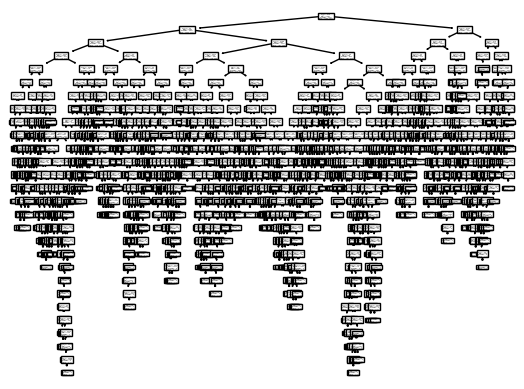

In [103]:
from sklearn.tree import plot_tree
plot_tree(dt)


In [117]:
# Get the feature importances
importance = dt.feature_importances_

# Create a dictionary of feature importance values
feature_importances = dict(zip(X_train_scaled.columns, importance))

# Sort the features by importance in descending order
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the important features
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

remainder__MonthlyCharges: 0.20677203713795786
remainder__TotalCharges: 0.19113261299368783
trf1__Contract: 0.16540078357547214
remainder__tenure: 0.13975753642108474
trf3__InternetService_Fiber optic: 0.043374977632616926
trf2__gender_Male: 0.030555705116431714
trf2__Partner_Yes: 0.023419948110488358
trf2__Dependents_Yes: 0.019030067350557085
customer_services_enrolled: 0.018997903543823105
trf2__OnlineSecurity_Yes: 0.018589335512474395
trf2__PaperlessBilling_Yes: 0.018026251023975676
trf2__PaymentMethod_Electronic check: 0.01579095831885737
trf2__MultipleLines_Yes: 0.014764672970168332
trf2__DeviceProtection_Yes: 0.01468215806741994
trf2__PaymentMethod_Mailed check: 0.014679914387158955
remainder__SeniorCitizen: 0.013785856679696003
trf2__PaymentMethod_Credit card (automatic): 0.011814159703443685
trf2__OnlineBackup_Yes: 0.01085276093377559
trf2__TechSupport_Yes: 0.010374642282002055
trf2__StreamingMovies_Yes: 0.008938520524203923
trf2__StreamingTV_Yes: 0.004792387520345167
trf2__Pho

### Random forests tend to provide more robust feature selection compared to individual decision trees. They can mitigate the issue of overfitting by reducing the impact of noise and capturing the generalizable patterns in the data.

### so used random forest for feature selection 

In [175]:
X_train_final

,trf1__Contract,customer_services_enrolled,remainder__tenure,remainder__MonthlyCharges,remainder__TotalCharges
0,0.5,0.625,0.750000,0.522671,0.434092
1,0.0,0.250,0.013889,0.620827,0.009275
2,0.5,0.125,0.180556,0.010463,0.029897
3,1.0,0.500,0.333333,0.780269,0.260622
4,0.0,0.250,0.083333,0.556552,0.051918
...,...,...,...,...,...
4925,0.0,0.500,0.013889,0.764823,0.010939
4926,1.0,1.000,0.319444,0.725959,0.253120
4927,0.0,0.125,0.166667,0.028899,0.035240
4928,0.0,0.625,0.166667,0.809168,0.138190


In [176]:



# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset
# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations
# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms

#all step are completed 

# 4. Evaluate Algorithms.

In [205]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [187]:
# Spot-Check Algorithms
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RANDOM_FOREST',RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train_final, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.785193 (0.014183)
LDA: 0.784787 (0.013919)
KNN: 0.769777 (0.017360)
CART: 0.728398 (0.014212)
NB: 0.700406 (0.023093)
SVM: 0.791075 (0.018188)
RANDOM_FOREST: 0.768357 (0.020622)


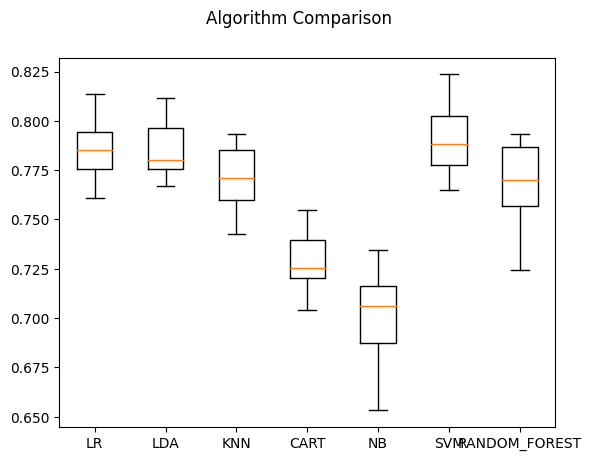

In [188]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### For now Make Predictions on test dataset with top 3 models: SVM,LR,LDA
    

In [191]:
# Make predictions on validation dataset
svm = SVC()
svm.fit(X_train_final, y_train)
predictions = svm.predict(X_test_final)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7893989588263133
[[1434  105]
 [ 340  234]]
              precision    recall  f1-score   support

          No       0.81      0.93      0.87      1539
         Yes       0.69      0.41      0.51       574

    accuracy                           0.79      2113
   macro avg       0.75      0.67      0.69      2113
weighted avg       0.78      0.79      0.77      2113



In [192]:
# Make predictions on validation dataset
lr = LogisticRegression()
lr.fit(X_train_final, y_train)
predictions = lr.predict(X_test_final)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7974443918599148
[[1392  147]
 [ 281  293]]
              precision    recall  f1-score   support

          No       0.83      0.90      0.87      1539
         Yes       0.67      0.51      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [193]:
# Make predictions on validation dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_final, y_train)
predictions = lda.predict(X_test_final)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7950780880265026
[[1377  162]
 [ 271  303]]
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1539
         Yes       0.65      0.53      0.58       574

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



# Algo Tunning

In [207]:

#Lets do tunning - start with SVM

# Tune scaled SVM
# scaler = StandardScaler().fit(X_train) -#my data is already scaled  - so no need to additional standard scaler
# rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
num_folds=10
scoring = 'accuracy'
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_final, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.793306 using {'C': 0.5, 'kernel': 'poly'}
0.786815 (0.022704) with: {'C': 0.1, 'kernel': 'linear'}
0.780933 (0.020405) with: {'C': 0.1, 'kernel': 'poly'}
0.791481 (0.020014) with: {'C': 0.1, 'kernel': 'rbf'}
0.724341 (0.015001) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.783773 (0.013307) with: {'C': 0.3, 'kernel': 'linear'}
0.793103 (0.019243) with: {'C': 0.3, 'kernel': 'poly'}
0.791886 (0.019396) with: {'C': 0.3, 'kernel': 'rbf'}
0.721907 (0.020048) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.784787 (0.012747) with: {'C': 0.5, 'kernel': 'linear'}
0.793306 (0.018820) with: {'C': 0.5, 'kernel': 'poly'}
0.791886 (0.020002) with: {'C': 0.5, 'kernel': 'rbf'}
0.719067 (0.020106) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.784787 (0.012152) with: {'C': 0.7, 'kernel': 'linear'}
0.792089 (0.018216) with: {'C': 0.7, 'kernel': 'poly'}
0.791684 (0.018986) with: {'C': 0.7, 'kernel': 'rbf'}
0.717850 (0.019550) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.784381 (0.012172) with: {'C': 0.9, 'kernel': 'linear

In [218]:
#Lets do tunning - Logistic regression


# Define the parameter grid for grid search
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C': [0.1, 1, 10],
              'fit_intercept': [True, False],
              #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [100, 200, 500]}

# Create a logistic regression model
model = LogisticRegression()

scoring = 'accuracy'
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_final, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.792089 using {'C': 0.1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1'}
0.792089 (0.018126) with: {'C': 0.1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'elasticnet'}
nan (nan) with: {'C': 0.1, 'fit_intercept': True, 'max_iter': 200, 'penalty': 'l1'}
0.792089 (0.018126) with: {'C': 0.1, 'fit_intercept': True, 'max_iter': 200, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'fit_intercept': True, 'max_iter': 200, 'penalty': 'elasticnet'}
nan (nan) with: {'C': 0.1, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l1'}
0.792089 (0.018126) with: {'C': 0.1, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'elasticnet'}
nan (nan) with: {'C': 0.1, 'fit_intercept': False, 'max_iter': 100, 'penalty': 'l1'}
0.788032 (0.0113

C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\linear_model\_

In [210]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train_final, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.784584 (0.014983)
GBM: 0.789858 (0.017827)
RF: 0.763489 (0.020927)
ET: 0.751927 (0.022588)


In [211]:
# Make predictions on validation dataset
AB = AdaBoostClassifier()
AB.fit(X_train_final, y_train)
predictions = AB.predict(X_test_final)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7950780880265026
[[1395  144]
 [ 289  285]]
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1539
         Yes       0.66      0.50      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.78      0.80      0.78      2113



# Final Result 

### 0.7974443918599148 - Logistic regression is giving high prediction even with default parameters 